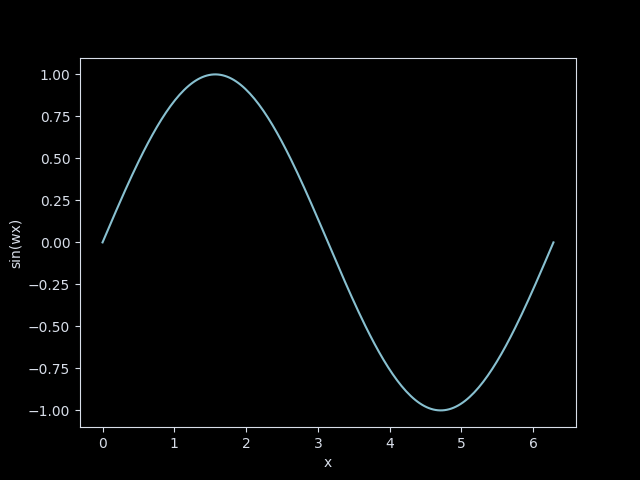

In [1]:
%matplotlib widget
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

x = np.linspace(0, 2 * np.pi, 200)
fig, ax = plt.subplots(facecolor='#2E3440')
line, = ax.plot(x, np.sin(x), color='#88C0D0')
ax.set_xlabel('x', color='#D8DEE9')
ax.set_ylabel('sin(wx)', color='#D8DEE9')
ax.tick_params(colors='#D8DEE9')
ax.spines['bottom'].set_color('#D8DEE9')
ax.spines['top'].set_color('#D8DEE9')
ax.spines['left'].set_color('#D8DEE9')
ax.spines['right'].set_color('#D8DEE9')

def update(w):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

w_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='w:')
widgets.interactive(update, w=w_slider)

plt.show()


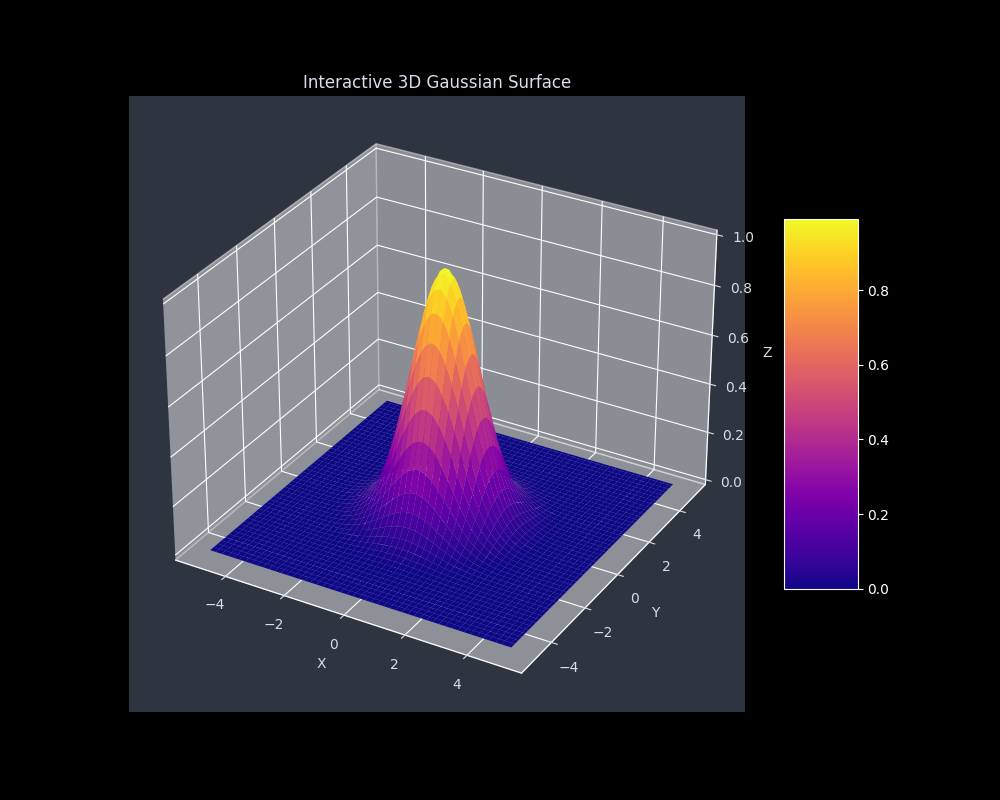

In [2]:
%matplotlib widget
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('dark_background')

def gaussian_2d(x, y, x0, y0, sigma_x, sigma_y, amplitude):
    return amplitude * np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 8), facecolor='#2E3440')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('#2E3440')

surf = ax.plot_surface(X, Y, gaussian_2d(X, Y, 0, 0, 1, 1, 1), cmap='plasma')
ax.set_xlabel('X', color='#D8DEE9')
ax.set_ylabel('Y', color='#D8DEE9')
ax.set_zlabel('Z', color='#D8DEE9')
ax.set_title('Interactive 3D Gaussian Surface', color='#D8DEE9')
ax.tick_params(colors='#D8DEE9')

fig.colorbar(surf, shrink=0.6, aspect=5)

def update(x0, y0, sigma_x, sigma_y, amplitude):
    ax.clear()
    ax.set_facecolor('#2E3440')
    Z = gaussian_2d(X, Y, x0, y0, sigma_x, sigma_y, amplitude)
    surf = ax.plot_surface(X, Y, Z, cmap='plasma')
    ax.set_xlabel('X', color='#D8DEE9')
    ax.set_ylabel('Y', color='#D8DEE9')
    ax.set_zlabel('Z', color='#D8DEE9')
    ax.set_title('Interactive 3D Gaussian Surface', color='#D8DEE9')
    ax.tick_params(colors='#D8DEE9')
    fig.canvas.draw_idle()

x0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='X Center:')
y0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Y Center:')
sigma_x_slider = widgets.FloatSlider(value=1, min=0.1, max=3, step=0.1, description='X Spread:')
sigma_y_slider = widgets.FloatSlider(value=1, min=0.1, max=3, step=0.1, description='Y Spread:')
amplitude_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Amplitude:')

widgets.interactive(update, x0=x0_slider, y0=y0_slider, sigma_x=sigma_x_slider, sigma_y=sigma_y_slider, amplitude=amplitude_slider)

plt.show()

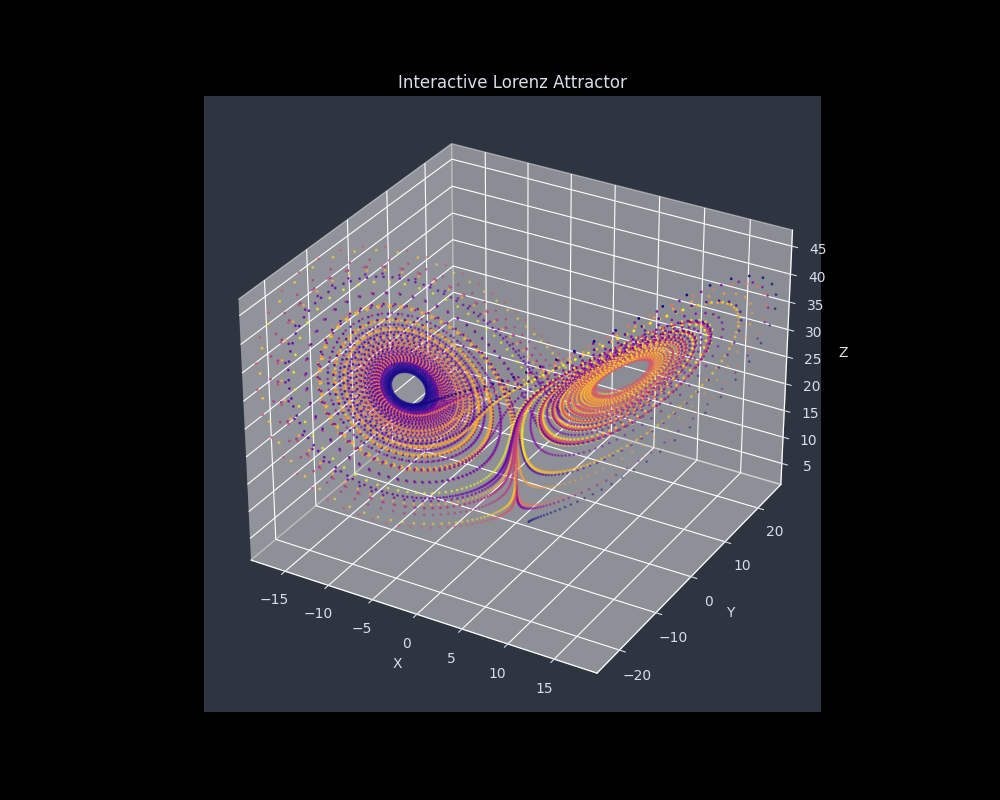

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import ipywidgets as widgets

plt.style.use('dark_background')

def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

def generate_lorenz_data(sigma, rho, beta, num_steps=10000):
    t = np.linspace(0, 100, num_steps)
    initial_state = [1.0, 1.0, 1.0]
    states = odeint(lorenz_system, initial_state, t, args=(sigma, rho, beta))
    return states

fig = plt.figure(figsize=(10, 8), facecolor='#2E3440')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('#2E3440')

states = generate_lorenz_data(10, 28, 8/3)
scatter = ax.scatter(states[:, 0], states[:, 1], states[:, 2], c=range(len(states)), cmap='plasma', s=1)
ax.set_xlabel('X', color='#D8DEE9')
ax.set_ylabel('Y', color='#D8DEE9')
ax.set_zlabel('Z', color='#D8DEE9')
ax.set_title('Interactive Lorenz Attractor', color='#D8DEE9')
ax.tick_params(colors='#D8DEE9')

def update(sigma, rho, beta):
    states = generate_lorenz_data(sigma, rho, beta)
    scatter._offsets3d = (states[:, 0], states[:, 1], states[:, 2])
    scatter.set_array(range(len(states)))
    ax.set_xlim(states[:, 0].min(), states[:, 0].max())
    ax.set_ylim(states[:, 1].min(), states[:, 1].max())
    ax.set_zlim(states[:, 2].min(), states[:, 2].max())
    fig.canvas.draw_idle()

sigma_slider = widgets.FloatSlider(value=10, min=0, max=20, step=0.1, description='?:')
rho_slider = widgets.FloatSlider(value=28, min=0, max=50, step=0.1, description='?:')
beta_slider = widgets.FloatSlider(value=8/3, min=0, max=5, step=0.1, description='?:')

widgets.interactive(update, sigma=sigma_slider, rho=rho_slider, beta=beta_slider)

plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a slider
slider = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Create a dropdown
dropdown = widgets.Dropdown(
    options=['option 1', 'option 2', 'option 3'],
    value='option 1',
    description='Choose:',
)

# Display the widgets
display(slider, dropdown)

# Function to handle widget changes
def on_value_change(change):
    print(f"Slider value: {slider.value}, Dropdown value: {dropdown.value}")

# Link the function to the widgets
slider.observe(on_value_change, names='value')
dropdown.observe(on_value_change, names='value')

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import time

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
label = widgets.Label(value="Starting...")
display(widgets.VBox([label, progress]))

for i in range(10):
    time.sleep(0.5)  # Simulate some work being done
    progress.value = (i + 1) / 10
    label.value = f"Step {i+1}/10 completed"

label.value = "Task completed!"

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML

tab_contents = ['Content of tab 1', 'Content of tab 2', 'Content of tab 3']
children = [widgets.HTML(value=content) for content in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = ['Tab 1', 'Tab 2', 'Tab 3']
display(tab)

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

%matplotlib inline

def plot_sine(amplitude, frequency):
    plt.figure(figsize=(10, 5))
    x = np.linspace(0, 10, 1000)
    y = amplitude * np.sin(frequency * x)
    plt.plot(x, y)
    plt.title(f'Sine Wave: Amplitude = {amplitude}, Frequency = {frequency}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.show()

amplitude_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Amplitude:')
frequency_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Frequency:')

widgets.interactive(plot_sine, amplitude=amplitude_slider, frequency=frequency_slider)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML

def show_selected_color(color):
    display(HTML(f'<div style="width:100px; height:100px; background-color:{color};"></div>'))
    print(f"Selected color: {color}")

color_picker = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='#ff0000',
    disabled=False
)

widgets.interactive(show_selected_color, color=color_picker)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure

image = data.moon()

def update_image(brightness, contrast):
    adjusted = exposure.adjust_gamma(image, brightness)
    adjusted = exposure.adjust_sigmoid(adjusted, cutoff=0.5, gain=contrast)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(adjusted, cmap='gray')
    plt.axis('off')
    plt.show()

brightness_slider = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Brightness:')
contrast_slider = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Contrast:')

widgets.interactive(update_image, brightness=brightness_slider, contrast=contrast_slider)


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Create a sample dataframe
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 28, 22],
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']
})

# Create a text widget for filtering
filter_text = widgets.Text(description='Filter:')

# Create the interactive table
def create_table(filter_value=''):
    if filter_value:
        filtered_df = df[df.apply(lambda row: row.astype(str).str.contains(filter_value, case=False).any(), axis=1)]
    else:
        filtered_df = df
    return filtered_df

# Display the interactive elements
display(filter_text)
table_output = widgets.Output()

def update_table(*args):
    with table_output:
        table_output.clear_output()
        display(create_table(filter_text.value))

filter_text.observe(update_table, names='value')

# Initial display
with table_output:
    display(create_table())

display(table_output)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import pyttsx3

def speak_text(text):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

text_input = widgets.Text(description='Text to speak:')
speak_button = widgets.Button(description='Speak')

def on_button_click(b):
    speak_text(text_input.value)

speak_button.on_click(on_button_click)

display(text_input, speak_button)


In [ ]:
import folium
from IPython.display import display

# Create a map centered on New York City
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add some markers
folium.Marker([40.7128, -74.0060], popup="New York City").add_to(m)
folium.Marker([40.7484, -73.9857], popup="Empire State Building").add_to(m)
folium.Marker([40.7061, -74.0047], popup="World Trade Center").add_to(m)

# Display the map
display(m)

In [ ]:
import networkx as nx
import plotly.graph_objects as go
from IPython.display import display

# Create a graph
G = nx.random_geometric_graph(20, 0.125)

# Create edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create nodes
node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# Color node points by the number of connections
node_adjacencies = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))

node_trace.marker.color = node_adjacencies
node_trace.text = [f'# of connections: {adj}' for adj in node_adjacencies]

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

display(fig)